In [3]:
import numpy as np
from random import random
import copy
import math
import scipy
import scipy.linalg   # SciPy Linear Algebra Library
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter
from tqdm import tqdm

def assign_positive_values(vector1, constant_C):
    # Find indices with positive values
    positive_indices = np.where(vector1 > 0)[0]
    vector_result = copy.deepcopy(vector1)
    
    # If no positive values, return original vector
  #  if len(positive_indices) == 0:
   #     return vector

    # Generate random values for positive entries
    random_values = np.random.rand(len(positive_indices))

    # Normalize random values to ensure their sum is equal to constant_C
    normalized_random_values = constant_C * (random_values / np.sum(random_values))

    # Assign the positive entries with the normalized random values
    vector_result[positive_indices] = normalized_random_values

    return vector_result
# Example usage:

def assign_negative_values(vector1, constant_C):
    # Find indices with positive values
    positive_indices = np.where(vector1 < 0)[0]
    vector_result = copy.deepcopy(vector1)
    
    # If no positive values, return original vector
  #  if len(positive_indices) == 0:
   #     return vector

    # Generate random values for positive entries
    random_values = np.random.rand(len(positive_indices))

    # Normalize random values to ensure their sum is equal to constant_C
    normalized_random_values = -constant_C * (random_values / np.sum(random_values))

    # Assign the positive entries with the normalized random values
    vector_result[positive_indices] = normalized_random_values

    return vector_result

def generate_same_sign_vector(vector_V, constant_C):
    vector_V_copy = copy.deepcopy(vector_V)
    vector_result = assign_positive_values(vector_V_copy, constant_C)
    vector_result = assign_negative_values(vector_result, constant_C)
    return vector_result

def generate_same_sign_matrix(Matrix_M, constant_C):
    # Ensure the matrix V has non-zero entries
    if np.all(Matrix_M == 0):
        raise ValueError("Matrix V must have entries different than 0.")

    rows, cols = np.shape(Matrix_M)
    matrix_U = np.zeros_like(Matrix_M)

    # Loop through each column of the matrix V
    for j in range(cols):
        constant_C1 = np.random.rand(1)*constant_C
        # Extract the j-th column of V
        vector_V = Matrix_M[:, j]
        # Generate the corresponding vector U
        vector_U = generate_same_sign_vector(vector_V, constant_C1)
        # Assign the generated vector U to the j-th column of U
        matrix_U[:, j] = vector_U
    return matrix_U


def cyclic_permutation_matrix(n):
    M = np.zeros((n, n), dtype = float)

    for i in range(n):
        M[i, :] = np.roll(np.arange(1, n+1), i)

    return M


def generate_matrix_coordinate(A):
    # Extract the first column of A
    x1 = A[:, 0]

    # Subtract x1 from the remaining columns of A
    B = A[:, 1:] - x1[:, np.newaxis]

    return B


In [41]:
n = 100
delta = 0.1*1/n
Const_C = 1 - (n+1)*delta
M = delta*cyclic_permutation_matrix(n).transpose()
Me = generate_matrix_coordinate(M)
#print("Me = \n", Me)
#print("M = \n", M)
iter = 20000
Save_cW = np.zeros(iter)

for i in range(iter):
    U = generate_same_sign_matrix(Me, Const_C)
    #print("U = \n", U)

    Gram_perms = np.matmul((Me+U).transpose(), (Me+U)) 
    Value_Gram_perms,Vector_Gram_perms = np.linalg.eig(Gram_perms)
    min_singular =  math.sqrt(   min(Value_Gram_perms))
    Save_cW[i] = (n*delta)/min_singular



# Convert the array to a DataFrame
df = pd.DataFrame(Save_cW)

# Define the filename
excel_file = "array_data.xlsx"

# Export the DataFrame to Excel
df.to_excel(excel_file, index=False, header=False)



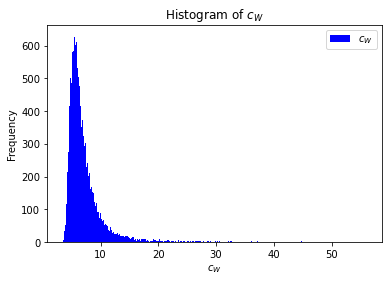

In [65]:
excel_file = "array_data.xlsx"
data = pd.read_excel(excel_file,usecols='A')
data_array = data.to_numpy()
data_min = np.min(data_array)
data_max = np.max(data_array)

# Add labels and title
fig_data = plt.hist(data_array, bins=500, range=[data_min, data_max/30], color='blue', density=False, label="$c_W$")

# Add a legend
plt.legend()

# Label the axes
plt.xlabel("$c_W$")
plt.ylabel('Frequency')

# Add a title
plt.title("Histogram of $c_W$")

#  Save fig
plt.savefig('c_W.png', dpi=300)

# Show the plot
plt.show()



In [30]:

#print("Me = \n", Me)
#print("M = \n", M)
iter = 20000
Save_cW = np.zeros(iter)
n_cases = [10,50,100,150]
workbook = xlsxwriter.Workbook('array_data.xlsx')
worksheet = workbook.add_worksheet()

for j in range(len(n_cases)):
    n = n_cases[j]
    delta = 0.1*1/n
    Const_C = 1 - (n+1)*delta
    M = delta*cyclic_permutation_matrix(n).transpose()
    Me = generate_matrix_coordinate(M)
    
    for i in range(iter):
        U = generate_same_sign_matrix(Me, Const_C)
        #print("U = \n", U)

        Gram_perms = np.matmul((Me+U).transpose(), (Me+U)) 
        Value_Gram_perms,Vector_Gram_perms = np.linalg.eig(Gram_perms)
        min_singular =  math.sqrt(   min(Value_Gram_perms))
        Save_cW[i] = (n*delta)/min_singular
    print(j)
    worksheet.write_column(0, j, Save_cW)

workbook.close()


0
1
2
3


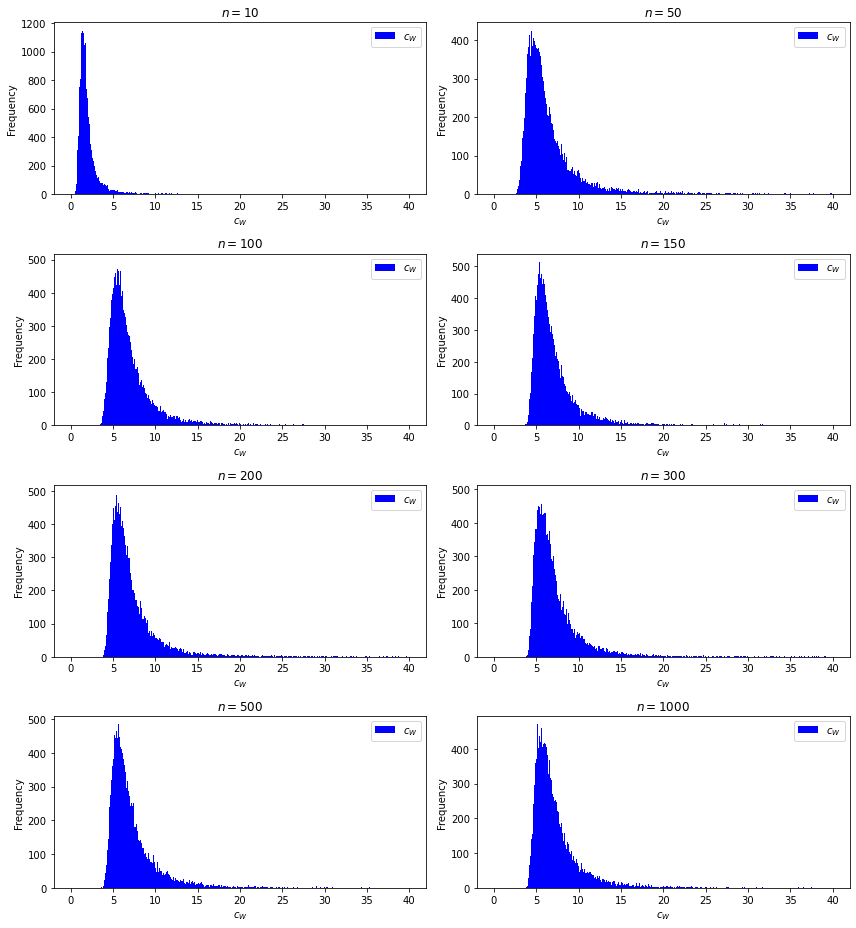

In [31]:
# PLOT EVERYTHING
excel_file = "array_data.xlsx"
data1 = pd.read_excel(excel_file,usecols='A').to_numpy() # 10
data2 = pd.read_excel(excel_file,usecols='B').to_numpy() # 50
data3 = pd.read_excel(excel_file,usecols='C').to_numpy() # 100
data4 = pd.read_excel(excel_file,usecols='D').to_numpy() # 150
data5 = pd.read_excel(excel_file,usecols='E').to_numpy() # 200
data6 = pd.read_excel(excel_file,usecols='F').to_numpy() # 300
data7 = pd.read_excel(excel_file,usecols='G').to_numpy() # 500
data8 = pd.read_excel(excel_file,usecols='H').to_numpy() # 1000

data = [data1, data2, data3, data4, data5, data6, data7, data8]


xaxes = "$c_W$"
yaxes = "Frequency"
titles = ['$n=10$','$n=50$','$n=100$','$n=150$','$n=200$', '$n=300$', '$n=500$', '$n=1000$'] 
#ratio_toMax = [200,20,20,20]
ratio_toMax = [1,1,1,1]
f,a = plt.subplots(4,2, figsize=(12, 13))
a = a.ravel()
for idx,ax in enumerate(a):
    #data_min = np.min(data[idx])
    #data_max = np.max(data[idx])
    data_min = 0
    data_max = 40
    ax.hist(data[idx], bins=500, range=[data_min, data_max], color='blue', density=False, label="$c_W$")
    ax.legend()
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes)
    ax.set_ylabel(yaxes)
plt.tight_layout()




# Add labels and title
#fig_data = plt.hist(data_array, bins=500, range=[data_min, data_max], color='blue', density=False, label="$c_W$")

# Add a legend
#plt.legend()

# Label the axes
#plt.xlabel("$c_W$")
#plt.ylabel('Frequency')

# Add a title
#plt.title("Histogram of $c_W$")

#  Save fig
plt.savefig('c_W.png', dpi=300)

# Show the plot
plt.show()

In [ ]:
#print("Me = \n", Me)
#print("M = \n", M)
iter = 20000
Save_cW = np.zeros(iter)
n_cases = [200,300]
workbook = xlsxwriter.Workbook('array_data3.xlsx')
worksheet = workbook.add_worksheet()

for j in range(len(n_cases)):
    n = n_cases[j]
    delta = 0.1*1/n
    Const_C = 1 - (n+1)*delta
    M = delta*cyclic_permutation_matrix(n).transpose()
    Me = generate_matrix_coordinate(M)
    with tqdm(total=iter) as pbar:
        
        for i in range(iter):
            U = generate_same_sign_matrix(Me, Const_C)
            #print("U = \n", U)

            Gram_perms = np.matmul((Me+U).transpose(), (Me+U)) 
            Value_Gram_perms,Vector_Gram_perms = np.linalg.eig(Gram_perms)
            min_singular =  math.sqrt(   min(Value_Gram_perms))
            Save_cW[i] = (n*delta)/min_singular

            #pbar.write('processed: %d' %i)
            pbar.update(1)
        
    worksheet.write_column(0, j, Save_cW)

workbook.close()

/Users/namtran/opt/anaconda3/lib/python3.9/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


IndexError: list index out of range

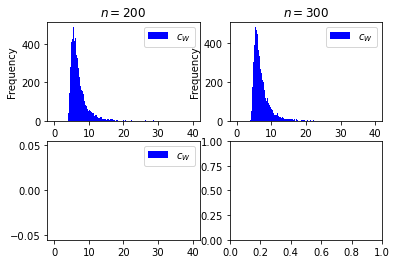

In [12]:
excel_file = "array_data2.xlsx"
data1 = pd.read_excel(excel_file,usecols='A').to_numpy()
data2 = pd.read_excel(excel_file,usecols='B').to_numpy()
data3 = pd.read_excel(excel_file,usecols='C').to_numpy()
data = [data1, data2, data3]


xaxes = "$c_W$"
yaxes = "Frequency"
titles = ['$n=200$','$n=300$'] 
#ratio_toMax = [200,20,20]
ratio_toMax = [1,1,1]
f,a = plt.subplots(2,2)
a = a.ravel()
for idx,ax in enumerate(a):
    #data_min = np.min(data[idx])
    #data_max = np.max(data[idx])
    data_min = 0
    data_max = 40
    ax.hist(data[idx], bins=500, range=[data_min, data_max/ratio_toMax[idx]], color='blue', density=False, label="$c_W$")
    ax.legend()
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes)
    ax.set_ylabel(yaxes)
plt.tight_layout()




# Add labels and title
#fig_data = plt.hist(data_array, bins=500, range=[data_min, data_max], color='blue', density=False, label="$c_W$")

# Add a legend
#plt.legend()

# Label the axes
#plt.xlabel("$c_W$")
#plt.ylabel('Frequency')

# Add a title
#plt.title("Histogram of $c_W$")

#  Save fig
plt.savefig('c_W.png', dpi=300)

# Show the plot
plt.show()

In [14]:
#print("Me = \n", Me)
#print("M = \n", M)
iter = 20000
Save_cW = np.zeros(iter)
n_cases = [1000]
workbook = xlsxwriter.Workbook('array_data3.xlsx')
workshee2 = workbook.add_worksheet("n=1000")


for j in range(len(n_cases)):
    n = n_cases[j]
    delta = 0.1*1/n
    Const_C = 1 - (n+1)*delta
    M = delta*cyclic_permutation_matrix(n).transpose()
    Me = generate_matrix_coordinate(M)
    with tqdm(total=iter) as pbar:
        
        for i in range(iter):
            U = generate_same_sign_matrix(Me, Const_C)
            #print("U = \n", U)

            Gram_perms = np.matmul((Me+U).transpose(), (Me+U)) 
            Value_Gram_perms,Vector_Gram_perms = np.linalg.eig(Gram_perms)
            min_singular =  math.sqrt(   min(Value_Gram_perms))
            Save_cW[i] = (n*delta)/min_singular

            #pbar.write('processed: %d' %i)
            pbar.update(1)
        
    workshee2.write_column(0, j, Save_cW)

workbook.close()

100%|███████████████████████████████████| 20000/20000 [3:31:41<00:00,  1.57it/s]


In [26]:
#print("Me = \n", Me)
#print("M = \n", M)
iter = 20000
Save_cW = np.zeros(iter)
n_cases = [500]
workbook = xlsxwriter.Workbook('array_data4.xlsx')
workshee2 = workbook.add_worksheet("n=500")


for j in range(len(n_cases)):
    n = n_cases[j]
    delta = 0.1*1/n
    Const_C = 1 - (n+1)*delta
    M = delta*cyclic_permutation_matrix(n).transpose()
    Me = generate_matrix_coordinate(M)
    with tqdm(total=iter) as pbar:
        
        for i in range(iter):
            U = generate_same_sign_matrix(Me, Const_C)
            #print("U = \n", U)

            Gram_perms = np.matmul((Me+U).transpose(), (Me+U)) 
            Value_Gram_perms,Vector_Gram_perms = np.linalg.eig(Gram_perms)
            min_singular =  math.sqrt(   min(Value_Gram_perms))
            Save_cW[i] = (n*delta)/min_singular

            #pbar.write('processed: %d' %i)
            pbar.update(1)
        
    workshee2.write_column(0, j, Save_cW)

workbook.close()

100%|███████████████████████████████████| 20000/20000 [1:01:45<00:00,  5.40it/s]
